In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read the data and load it in a df
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
hdi = pd.read_csv('./hdi.csv')

In [2]:
#starting data (first 5 rows)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## In which country do people work most remotely

In [3]:
#check for null values in country and salary columns
print(df['Country'].isnull().sum())
print(df['HomeRemote'].isnull().sum())

0
7384


In [4]:
#drop rows with missing HomeRemote values & rows where country = 'I prefer not to say'
df_drop_homeremote=df.dropna(subset=["HomeRemote"],axis=0)
df_drop_final = df_drop_homeremote.drop(df_drop_homeremote[df_drop_homeremote['Country'] == 'I prefer not to say'].index)
df_drop_final

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [5]:
# show unique values of HomeRemote column
df_drop_final['HomeRemote'].unique()


array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       "It's complicated", 'A few days each month', 'About half the time'],
      dtype=object)

In [6]:
# encode HomeRemote values with a score, 0 being the lowest (no remote work) and 5 the highest (Full time remote)

df_drop_final.loc[df_drop_final['HomeRemote'] == "It's complicated", 'HomeRemote'] = 0.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "Never", 'HomeRemote'] = 0.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "A few days each month", 'HomeRemote'] = 1.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "Less than half the time, but at least one day each week", 'HomeRemote'] = 2.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "About half the time", 'HomeRemote'] = 3.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "More than half, but not all, the time", 'HomeRemote'] = 4.0
df_drop_final.loc[df_drop_final['HomeRemote'] == "All or almost all the time (I'm full-time remote)", 'HomeRemote'] = 5.0
df_drop_final

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,4.0,20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,2.0,"10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,2.0,"10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,0.0,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,2.0,20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,1.0,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,0.0,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",2.0,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,0.0,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [7]:
#create new df where only Country and HomeRemote info are kept
new_df_homeremote = df_drop_final[['Country', 'HomeRemote']]
new_df_homeremote

,Country,HomeRemote
1,United Kingdom,4.0
2,United Kingdom,2.0
3,United States,2.0
4,Switzerland,0.0
6,United States,2.0
...,...,...
51387,United States,1.0
51388,Venezuela,0.0
51389,Canada,2.0
51390,United States,0.0


In [8]:
# convert HomeRemote scores from Object to Float, to be able to calculate mean subsequently
pd.set_option('mode.chained_assignment', None)
new_df_homeremote['HomeRemote'] = new_df_homeremote['HomeRemote'].astype(float)

#new_df_homeremote.loc[:, 'HomeRemote'] = new_df_homeremote.loc[:, 'HomeRemote'].astype(float)

In [9]:
# check that HomeRemote now contains float values
print(new_df_homeremote['HomeRemote'].dtypes)

float64


In [10]:
pd.set_option('display.max_rows', None)
#Group by country, calculate HomeRemote mean score for each country, and sort them out
series2=new_df_homeremote.groupby(['Country']).mean()['HomeRemote'].sort_values()
mean_homeremote_df=series2.to_frame()
mean_homeremote_df

,HomeRemote
Country,
Saint Lucia,0.000000
Reunion (French),0.000000
Polynesia (French),0.000000
French Guyana,0.000000
Fiji,0.000000
Falkland Islands,0.000000
Cayman Islands,0.000000
Vatican City State,0.000000
Bermuda,0.000000


## List of countries with very high HDI

In [11]:
#drop rows with missing hdicode values
hdi_drop=hdi.dropna(subset=["hdicode"],axis=0)

#only keep rows where hdicode is very high
    # Create a boolean series
boolean_series = hdi_drop['hdicode'] == 'Very High'
    # Use the boolean series as a filter on the DataFrame using .loc
hdi_drop_final = hdi_drop.loc[boolean_series]

#converts df with countries with hdicode- 'Very high' to a list
country_list = hdi_drop_final['country'].tolist()
country_list

['Andorra',
 'United Arab Emirates',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bahrain',
 'Bahamas',
 'Belarus',
 'Brunei Darussalam',
 'Canada',
 'Switzerland',
 'Chile',
 'Costa Rica',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Georgia',
 'Greece',
 'Hong Kong, China (SAR)',
 'Croatia',
 'Hungary',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea (Republic of)',
 'Kuwait',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Malta',
 'Montenegro',
 'Mauritius',
 'Malaysia',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Oman',
 'Panama',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Uruguay',
 'United States']

## In which country with very high HDI do people work most remotely

In [12]:
#only keep rows for countries with very high HDI
filtered_mean_homeremote_df = mean_homeremote_df[mean_homeremote_df.index.isin(country_list)]
filtered_mean_homeremote_df

,HomeRemote
Country,
Liechtenstein,0.333333
Oman,0.500000
Iceland,0.800000
Japan,0.863014
Singapore,0.868613
Luxembourg,0.923077
Switzerland,0.923507
Malta,0.977273
Qatar,1.000000


In [13]:
#only keep rows where HomeRemote score is between 1 and 2.5
    # Create a boolean series
boolean_series = (filtered_mean_homeremote_df['HomeRemote'] > 1) & (filtered_mean_homeremote_df['HomeRemote'] < 2.5)
    # Use the boolean series as a filter on the DataFrame using .loc
filtered_mean_homeremote_cutoff_df = filtered_mean_homeremote_df.loc[boolean_series]
filtered_mean_homeremote_cutoff_df

,HomeRemote
Country,
Sweden,1.020484
New Zealand,1.031390
Ireland,1.061489
Austria,1.065217
France,1.065552
Germany,1.067945
United Kingdom,1.155888
Netherlands,1.156379
Spain,1.160305


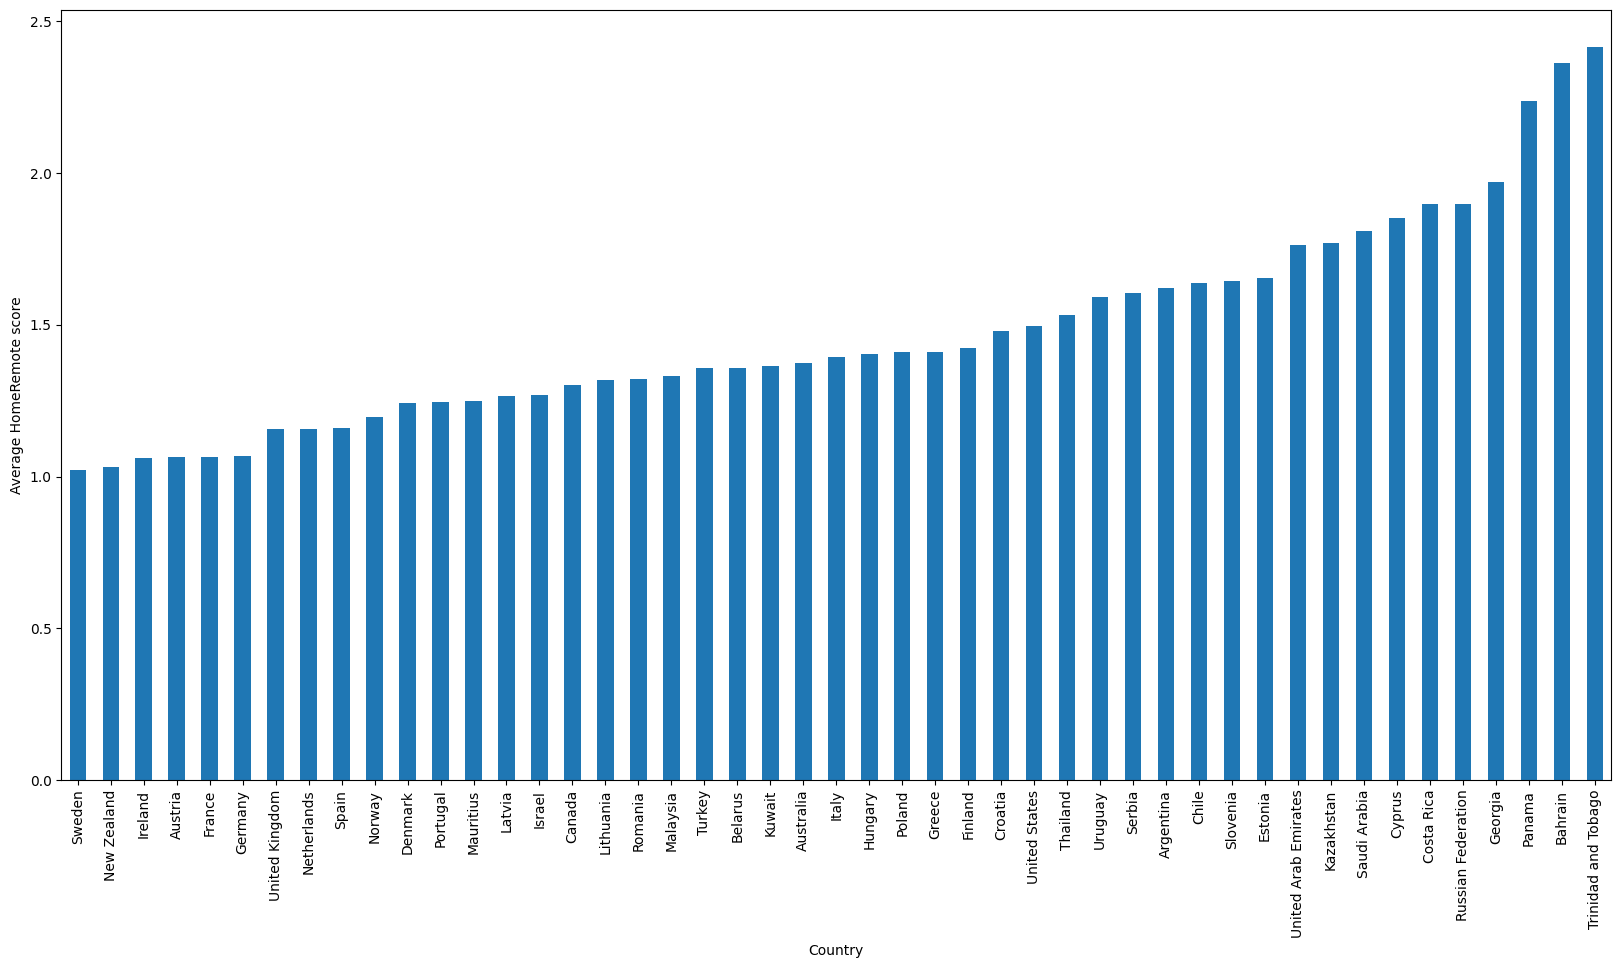

In [14]:
# plot Avergae HomeRemote score per country (only for countries with very high HDI where 1<HomeRemote score<2.5)
filtered_mean_homeremote_cutoff_df.plot.bar(legend=None, figsize=(20,10))
plt.xlabel("Country")
plt.ylabel("Average HomeRemote score")
plt.show()